In [115]:
# install libraries 
%conda install pandas numpy matplotlib seaborn

Retrieving notices: ...working... done
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.7.4
  latest version: 23.9.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.9.0



# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [116]:
# import necessary libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [117]:
# Load the csv data into a dataFrame 
df = pd.read_csv('./data/StockX-Data-Contest-2019-3 2.csv')

In [118]:
# Running df.info() will will provide us the structural details of the DataFrame, 
# such as the number of entries, column names, and data types. 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99956 entries, 0 to 99955
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order Date    99956 non-null  object 
 1   Brand         99956 non-null  object 
 2   Sneaker Name  99956 non-null  object 
 3   Sale Price    99956 non-null  object 
 4   Retail Price  99956 non-null  object 
 5   Release Date  99956 non-null  object 
 6   Shoe Size     99956 non-null  float64
 7   Buyer Region  99956 non-null  object 
dtypes: float64(1), object(7)
memory usage: 6.1+ MB


### Note
- As you can see from the output above, we need to clean some of this data. 
- Most of the values are of type 'object' 
- Columns like "Order Date," "Sale Price," "Release Date," and "Shoe Size" appear to be numerical data types, but they are currently stored as objects.

In [119]:
# Running df.head() well help us get a visual snapshot of what our data actually looks like 
df.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
0,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,"$1,097",$220,9/24/16,11.0,California
1,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,$685,$220,11/23/16,11.0,California
2,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,$690,$220,11/23/16,11.0,California
3,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,"$1,075",$220,11/23/16,11.5,Kentucky
4,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,$828,$220,2/11/17,11.0,Rhode Island


## Data Cleaning 
- To clean and prep this data for analysis we will be converting the following columns: 
    - Order Date and Release Date --> DateTime objects 
    - Sale Price and Retail Price --> Strings to Numerica data values
- Lastly, we will check to see if there are any missing values or NaN values

In [120]:
# Convert 'Order Date' and 'Release Date' to DateTime objects

df['Order Date'] = pd.to_datetime(df['Order Date'])

df['Release Date'] = pd.to_datetime(df['Release Date'])


/var/folders/vw/cxt6ymbx2d9bnhpxnxhthftw0000gn/T/ipykernel_60337/1170682018.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Order Date'] = pd.to_datetime(df['Order Date'])
/var/folders/vw/cxt6ymbx2d9bnhpxnxhthftw0000gn/T/ipykernel_60337/1170682018.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Release Date'] = pd.to_datetime(df['Release Date'])


### Convert Sale Price and Retail price to Numerical Values 
- These values are currently strings with dollar signs, which makes numerical analysis impossible.

In [121]:
# Remove dollar signs and convert to float

df['Sale Price'] = df['Sale Price'].str.replace('$', '').str.replace(',', '').astype(float)
df['Retail Price'] = df['Retail Price'].str.replace('$', '').str.replace(',', '').astype(float)


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99956 entries, 0 to 99955
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order Date    99956 non-null  datetime64[ns]
 1   Brand         99956 non-null  object        
 2   Sneaker Name  99956 non-null  object        
 3   Sale Price    99956 non-null  float64       
 4   Retail Price  99956 non-null  float64       
 5   Release Date  99956 non-null  datetime64[ns]
 6   Shoe Size     99956 non-null  float64       
 7   Buyer Region  99956 non-null  object        
dtypes: datetime64[ns](2), float64(3), object(3)
memory usage: 6.1+ MB


## Exploratory Data Analysis (EDA)
- First we will start off with getting an idea of the price distribution of the sales price of the entire data set 
and then we will group it by brand. 
- We will do this by creating a histogram which is great for numerical data. 

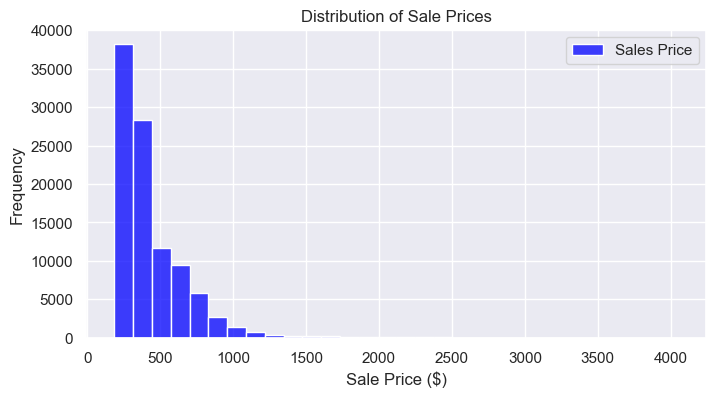

'\nExplaination of Code\n\n1. max_val = int(df[\'Sale Price\'].max())\n    - df[\'Sale Price\'].max() retrieves the maximum value from the "Sale Price" column in the DataFrame.\n    - int(...) rounds this value down to the nearest integer. This is done to ensure that the tick marks are whole numbers.\n    - The result is stored in a variable called `max_val`.\n\n2. plt.xticks(np.arange(0, max_val+1, 100)) \n    - np.arange(0, max_val+1, 100) creates a NumPy array that starts from 0 and goes up to `max_val + 1`, incrementing by 100 at each step. For example, if `max_val` is 1500, this would generate an array `[0, 100, 200, ..., 1500]`.\n    - plt.xticks(...) sets these values as the tick marks on the x-axis of the plot.\n\nThe reason for `max_val+1` is to include the maximum value in the tick labels. If you just used `max_val`, the maximum value would be excluded from the NumPy array generated by `np.arange()`.\n\nIn summary, this code snippet dynamically sets the x-axis tick marks base

In [131]:
# Histogram using Seaborn 

# Set the style and size for better visibility
sns.set(style="darkgrid")
plt.figure(figsize=(8, 4))

# Generate the histogram for Sale Price
sns.histplot(df['Sale Price'], bins=30, kde=False, color='blue', label = 'Sales Price')

plt.title('Distribution of Sale Prices')
plt.xlabel('Sale Price ($)')
plt.ylabel('Frequency')



# Customize x-axis tick labels
max_val = int(df['Sale Price'].max())
plt.xticks(np.arange(0, max_val+1, 500))
plt.legend()

plt.show()

'''
Explaination of Code

1. max_val = int(df['Sale Price'].max())
    - df['Sale Price'].max() retrieves the maximum value from the "Sale Price" column in the DataFrame.
    - int(...) rounds this value down to the nearest integer. This is done to ensure that the tick marks are whole numbers.
    - The result is stored in a variable called `max_val`.

2. plt.xticks(np.arange(0, max_val+1, 100)) 
    - np.arange(0, max_val+1, 100) creates a NumPy array that starts from 0 and goes up to `max_val + 1`, incrementing by 100 at each step. For example, if `max_val` is 1500, this would generate an array `[0, 100, 200, ..., 1500]`.
    - plt.xticks(...) sets these values as the tick marks on the x-axis of the plot.

The reason for `max_val+1` is to include the maximum value in the tick labels. If you just used `max_val`, the maximum value would be excluded from the NumPy array generated by `np.arange()`.

In summary, this code snippet dynamically sets the x-axis tick marks based on the maximum value in the "Sale Price" column, with ticks incrementing by 100.

'''




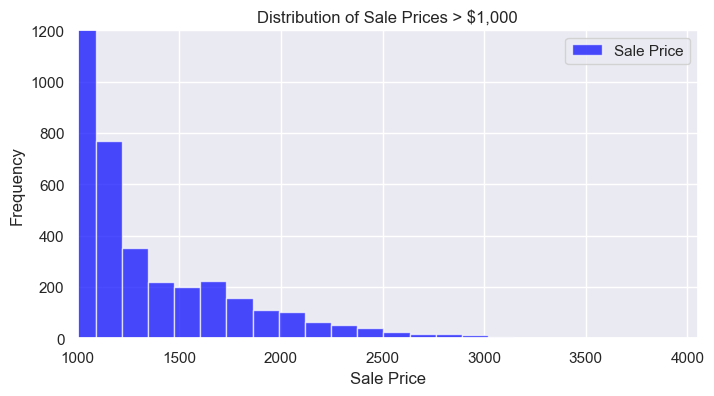

In [124]:
# Here is the same data but zoomed in on the outliers
# There are the sales that were greater than $1,000

sns.set(style="darkgrid")
plt.figure(figsize=(8, 4))
plt.hist(df['Sale Price'], bins=30, color='blue', alpha=0.7, label='Sale Price')
plt.title('Distribution of Sale Prices > $1,000')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.xlim([1000, df['Sale Price'].max()+1])  # Set x-axis limits
plt.ylim([0, 1200]) # Set y-axis limits 
plt.legend()
plt.grid(True)
plt.show()


In [125]:
df['Sale Price'].describe()

count    99956.000000
mean       446.634719
std        255.982969
min        186.000000
25%        275.000000
50%        370.000000
75%        540.000000
max       4050.000000
Name: Sale Price, dtype: float64

<Axes: xlabel='Sale Price'>

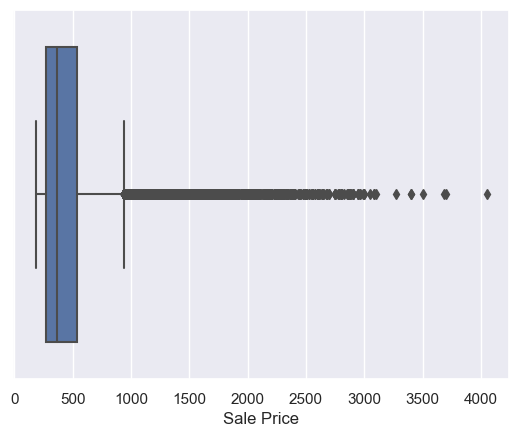

In [126]:
sns.boxplot(x=df['Sale Price'], orient='Vertical')


<Axes: xlabel='Sale Price'>

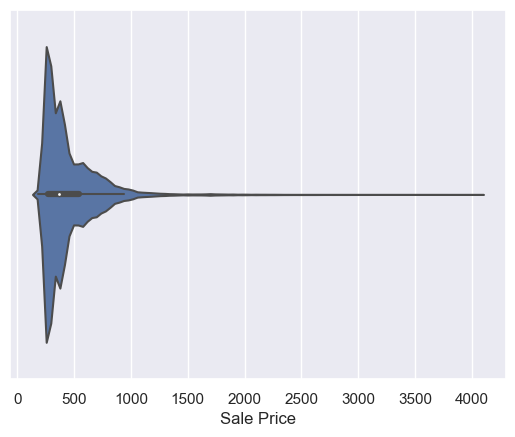

In [127]:
sns.violinplot(x=df['Sale Price'])


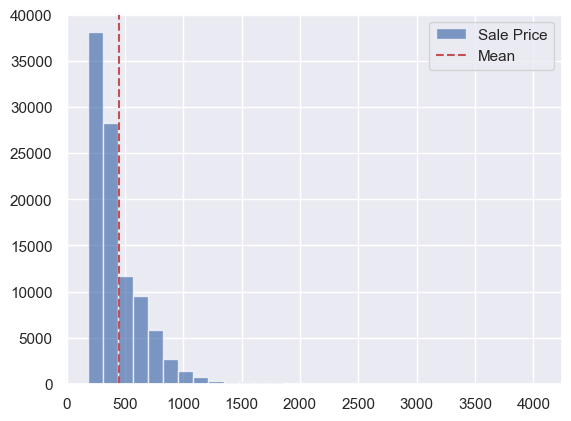

In [128]:
mean = df['Sale Price'].mean()
std_dev = df['Sale Price'].std()

plt.hist(df['Sale Price'], bins=30, alpha=0.7, label='Sale Price')
plt.axvline(mean, color='r', linestyle='--', label='Mean')
plt.legend()




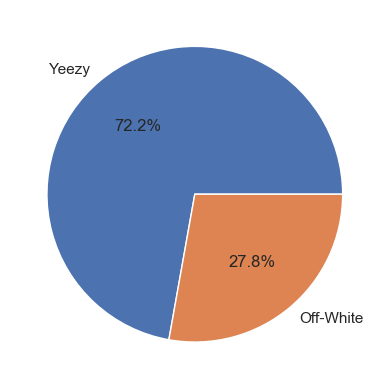

In [129]:
# Pie Chart for Brand (categorical data)

category_counts = df['Brand'].value_counts()
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%')
plt.show()
